# Aplikasi Regresi untuk Pemecahan Problem
### Metode: Regresi Linear, Regresi Pangkat Sederhana, dan Regresi Linearisasi Laju Pertumbuhan Jenuh

**Annas Tri Widagdo (21120122140112)**      
**Course: Metode Numerik - (Kelas D)**      
**Department of Computer Engineering**      
**Diponegoro University**        

Cuplikan data dari dataset:
   Sample Question Papers Practiced  Performance Index
0                                 1               91.0
1                                 2               65.0
2                                 2               45.0
3                                 2               36.0
4                                 5               66.0


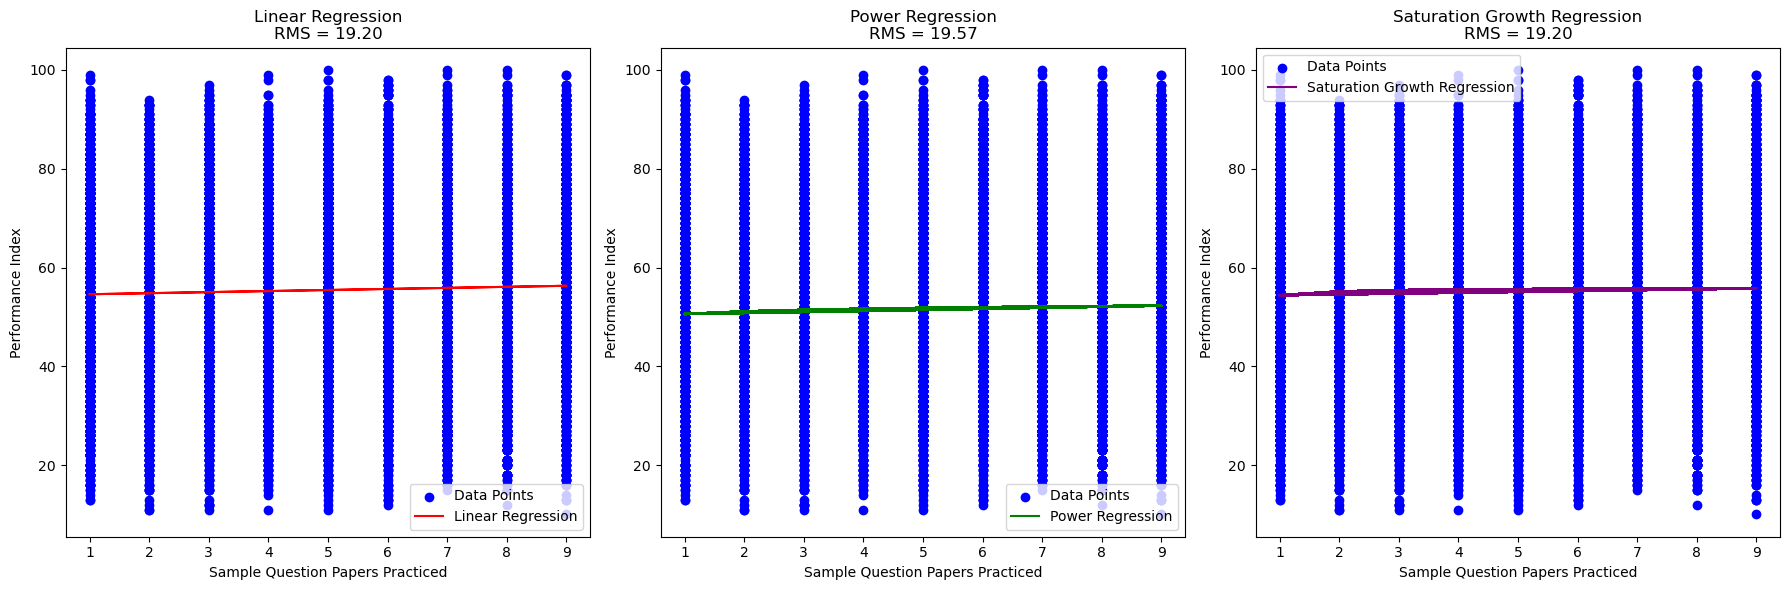

Hasil Regresi Linear:
b0: 54.38111803140568
b1: 0.21384729199070604
f(x) = 54.38 + 0.21 * X
RMS: 19.196567736370024

Hasil Regresi Model Pangkat:
b0: 50.59152248356452
b1: 0.01493019786166114
f(x) = 50.59 * X^0.0149
RMS: 19.565035257712683

Hasil Regresi Model Linearisasi Laju Pertumbuhan Jenuh:
a: 55.95305724553013
b: 0.028719896671325705
f(x) = 55.95 * X / (0.0287 + X)
RMS: 19.20003630560624


In [6]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Membaca dataset
data = pd.read_csv('Student_Performance.csv')

# Menampilkan cuplikan data
print("Cuplikan data dari dataset:")
print(data[['Sample Question Papers Practiced', 'Performance Index']].head())

# Mengambil kolom yang diperlukan
X = data['Sample Question Papers Practiced'].values
Y = data['Performance Index'].values

# Menghapus nilai 0 pada X dan Y terkait
non_zero_indices = X > 0
X = X[non_zero_indices]
Y = Y[non_zero_indices]

# Fungsi regresi linear sederhana
def linear_regression(X, Y):
    n = len(X)
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)
    
    num = np.sum((X - X_mean) * (Y - Y_mean))
    den = np.sum((X - X_mean)**2)
    
    b1 = num / den
    b0 = Y_mean - b1 * X_mean
    
    return b0, b1

# Fungsi regresi model pangkat sederhana
def power_regression(X, Y):
    log_X = np.log(X)
    log_Y = np.log(Y)
    
    b0_log, b1_log = linear_regression(log_X, log_Y)
    
    b0 = np.exp(b0_log)
    b1 = b1_log
    
    return b0, b1

# Fungsi regresi model linearisasi laju pertumbuhan jenuh
def saturation_growth_regression(X, Y):
    def model(X, a, b):
        return (a * X) / (b + X)
    
    params, _ = curve_fit(model, X, Y, bounds=(0, [np.inf, np.inf]))
    
    return params

# Menghitung RMS
def calculate_rms(Y_actual, Y_pred):
    return np.sqrt(np.mean((Y_actual - Y_pred)**2))

# Regresi linear
b0_linear, b1_linear = linear_regression(X, Y)
Y_pred_linear = b0_linear + b1_linear * X
rms_linear = calculate_rms(Y, Y_pred_linear)

# Regresi model pangkat
b0_power, b1_power = power_regression(X, Y)
Y_pred_power = b0_power * X**b1_power
rms_power = calculate_rms(Y, Y_pred_power)

# Regresi model linearisasi laju pertumbuhan jenuh
a_saturation, b_saturation = saturation_growth_regression(X, Y)
Y_pred_saturation = (a_saturation * X) / (b_saturation + X)
rms_saturation = calculate_rms(Y, Y_pred_saturation)

# Plot hasil regresi
plt.figure(figsize=(18, 6))

# Plot regresi linear
plt.subplot(1, 3, 1)
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred_linear, color='red', label='Linear Regression')
plt.title('Linear Regression\nRMS = {:.2f}'.format(rms_linear))
plt.xlabel('Sample Question Papers Practiced')
plt.ylabel('Performance Index')
plt.legend()

# Plot regresi model pangkat
plt.subplot(1, 3, 2)
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred_power, color='green', label='Power Regression')
plt.title('Power Regression\nRMS = {:.2f}'.format(rms_power))
plt.xlabel('Sample Question Papers Practiced')
plt.ylabel('Performance Index')
plt.legend()

# Plot regresi model laju pertumbuhan jenuh
plt.subplot(1, 3, 3)
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred_saturation, color='purple', label='Saturation Growth Regression')
plt.title('Saturation Growth Regression\nRMS = {:.2f}'.format(rms_saturation))
plt.xlabel('Sample Question Papers Practiced')
plt.ylabel('Performance Index')
plt.legend()

plt.tight_layout()
plt.show()

# Output hasil regresi
print("Hasil Regresi Linear:")
print("b0:", b0_linear)
print("b1:", b1_linear)
print("f(x) = {:.2f} + {:.2f} * X".format(b0_linear, b1_linear))
print("RMS:", rms_linear)

print("\nHasil Regresi Model Pangkat:")
print("b0:", b0_power)
print("b1:", b1_power)
print("f(x) = {:.2f} * X^{:.4f}".format(b0_power, b1_power))
print("RMS:", rms_power)

print("\nHasil Regresi Model Linearisasi Laju Pertumbuhan Jenuh:")
print("a:", a_saturation)
print("b:", b_saturation)
print("f(x) = {:.2f} * X / ({:.4f} + X)".format(a_saturation, b_saturation))
print("RMS:", rms_saturation)
